In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error, r2_score

In [2]:
calories = pd.read_csv('calories.csv')

In [3]:
excercise = pd.read_csv('exercise.csv')

In [4]:
calories_data = pd.concat([excercise, calories['Calories']], axis=1)

In [5]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [7]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
calories_data.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [9]:
calories_data.shape

(15000, 9)

<Axes: xlabel='count', ylabel='Gender'>

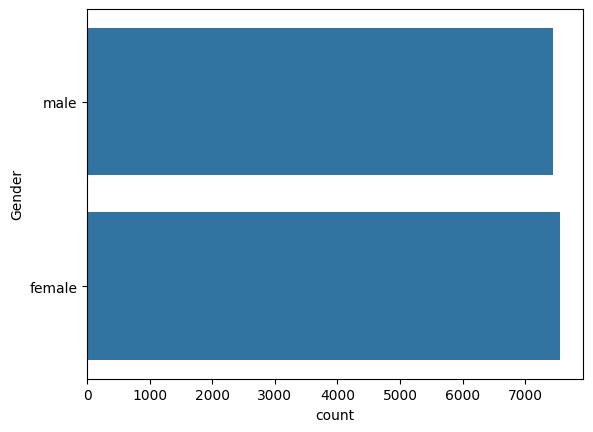

In [10]:
sns.countplot(calories_data['Gender'])

/var/folders/5b/vf5hrqmd0z7_801v82j5pb680000gn/T/ipykernel_32031/1950677799.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

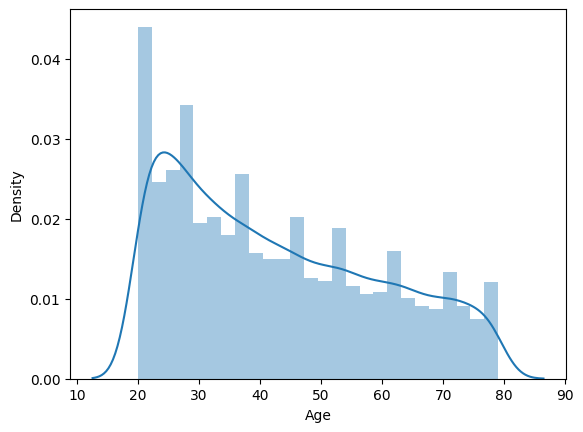

In [11]:
sns.distplot(calories_data['Age'])

/var/folders/5b/vf5hrqmd0z7_801v82j5pb680000gn/T/ipykernel_32031/2430521470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

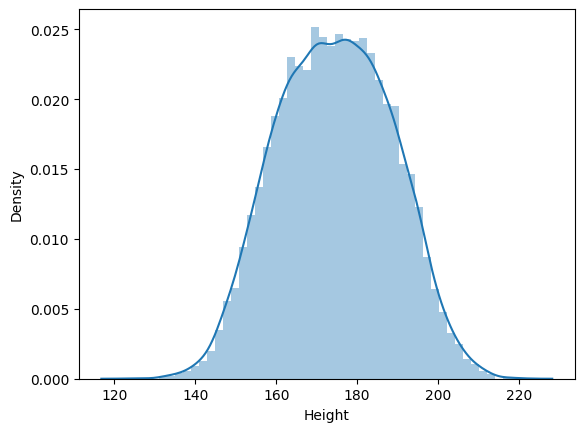

In [12]:
sns.distplot(calories_data['Height'])

/var/folders/5b/vf5hrqmd0z7_801v82j5pb680000gn/T/ipykernel_32031/1539919118.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

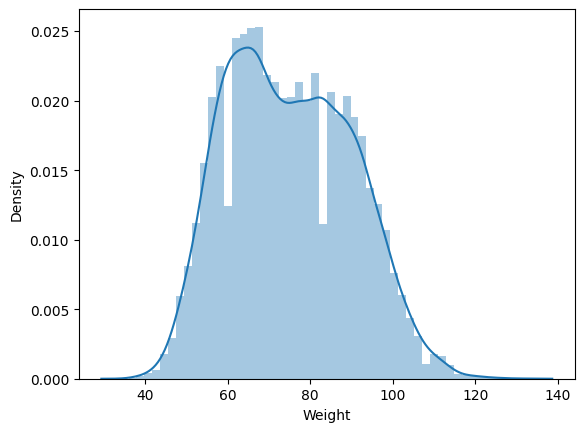

In [13]:
sns.distplot(calories_data['Weight'])

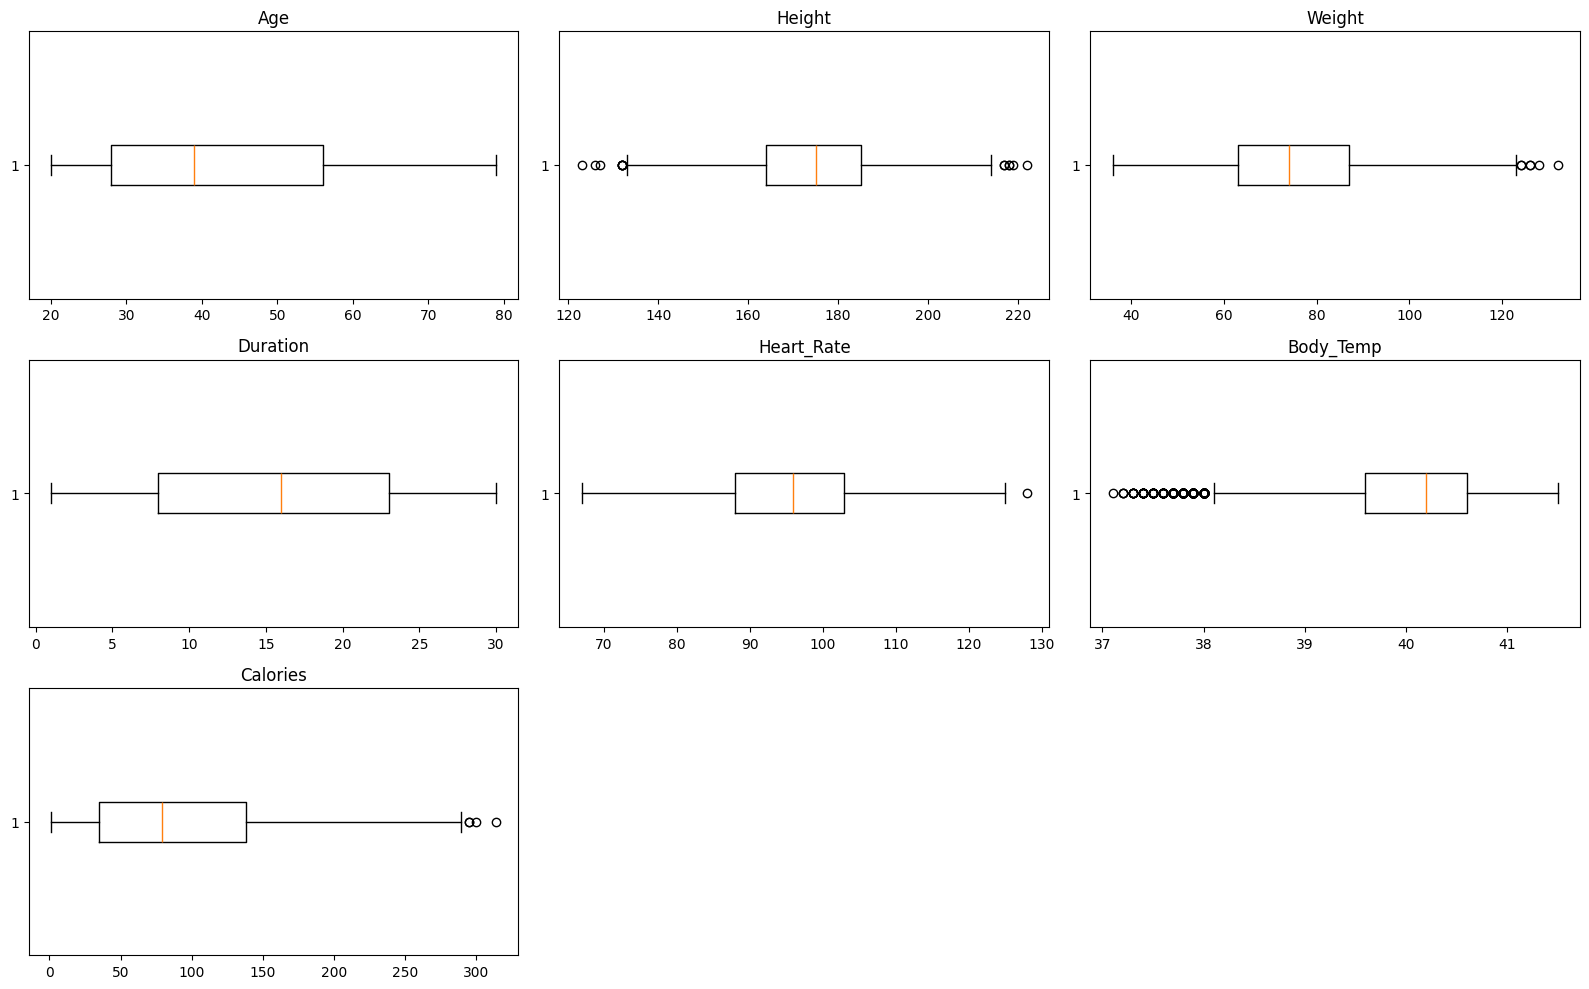

In [14]:
import matplotlib.pyplot as plt

# Select numerical columns only
numeric_cols = [
    'Age',
    'Height',
    'Weight',
    'Duration',
    'Heart_Rate',
    'Body_Temp',
    'Calories'
]

plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(calories_data[col], vert=False)
    plt.title(col)

plt.tight_layout()
plt.show()


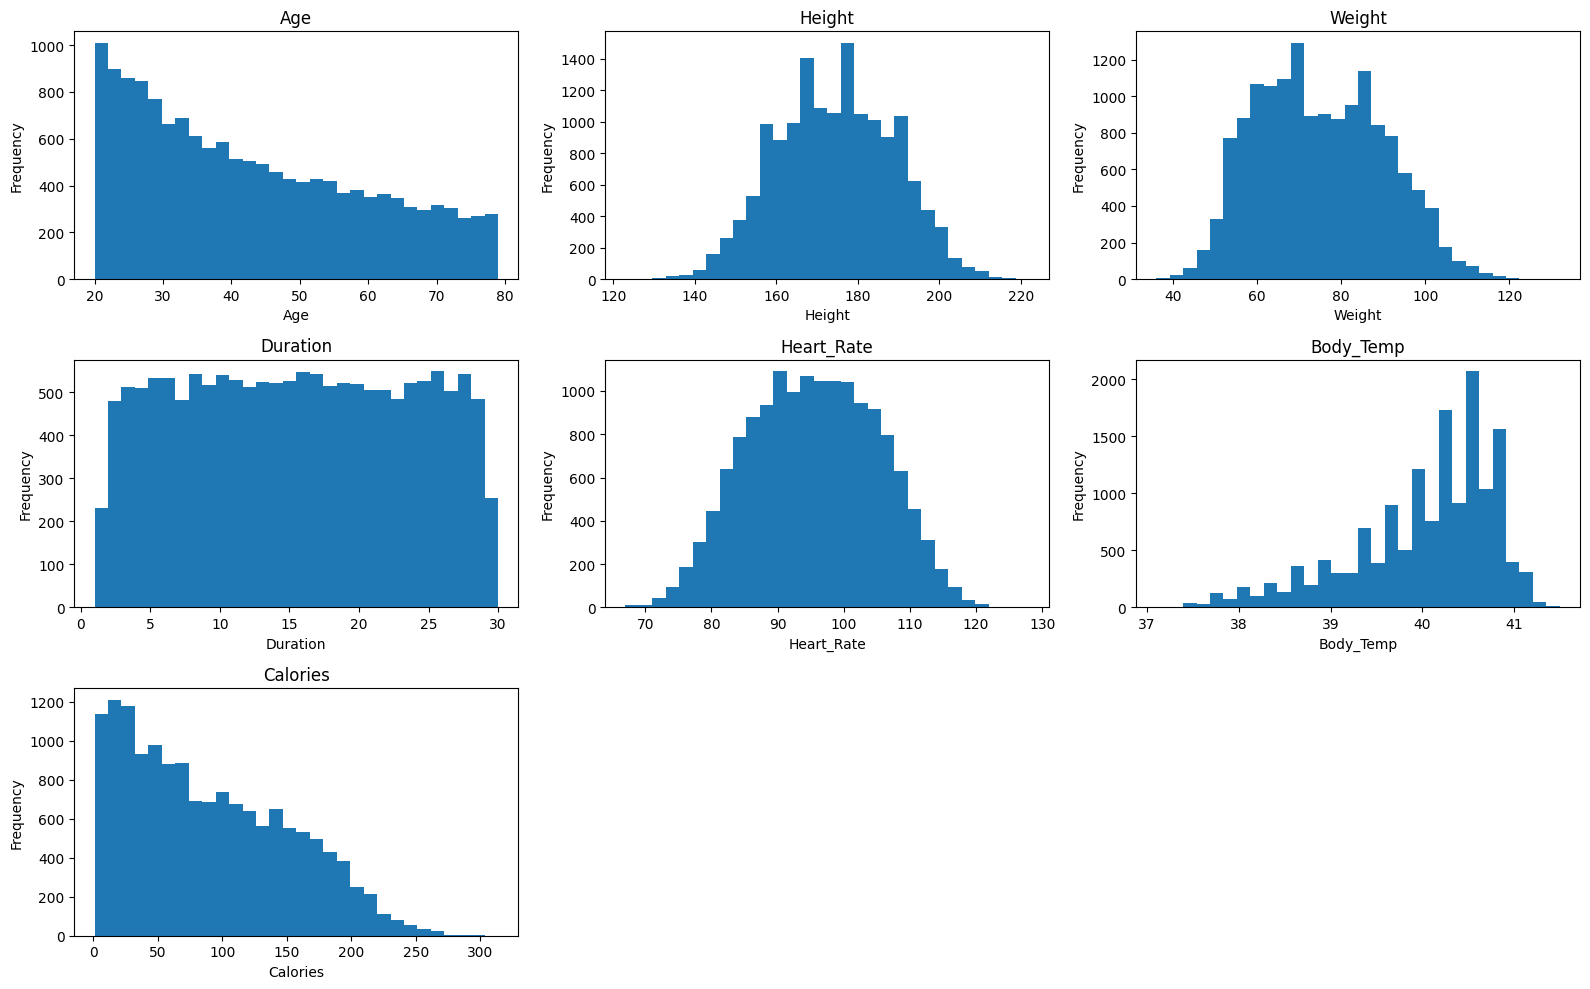

In [15]:
import matplotlib.pyplot as plt

numeric_cols = [
    'Age',
    'Height',
    'Weight',
    'Duration',
    'Heart_Rate',
    'Body_Temp',
    'Calories'
]

plt.figure(figsize=(16, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(calories_data[col], bins=30)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [16]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

/var/folders/5b/vf5hrqmd0z7_801v82j5pb680000gn/T/ipykernel_32031/2713499166.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)


In [17]:
corr = calories_data.corr()

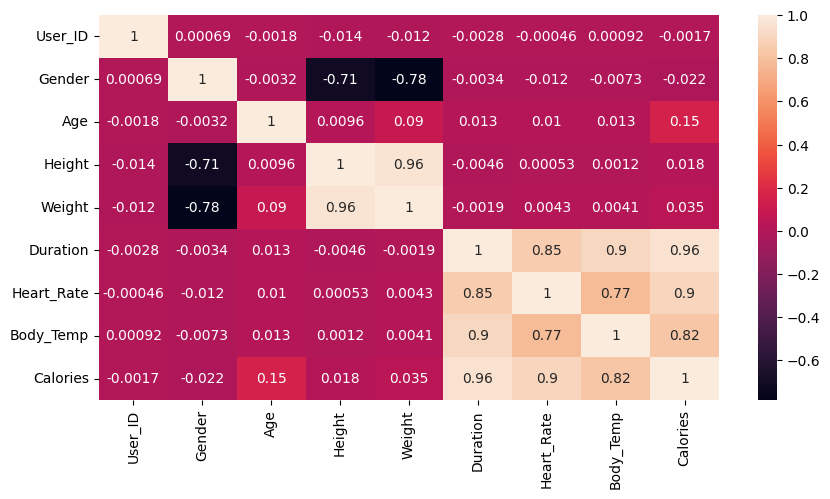

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot= True)
plt.show()

In [19]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# decision_tree

In [21]:
decision_tree = DecisionTreeRegressor()

In [22]:
decision_tree.fit(X_train,Y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [23]:
y_pred_train = decision_tree.predict(X_train)

In [24]:
y_pred_test = decision_tree.predict(X_test)

In [25]:
mean_absolute_error(Y_train, y_pred_train)

0.0

In [26]:
mean_absolute_error(Y_test, y_pred_test)

3.4106666666666667

# RandomForestRegressor

In [27]:
rfe = RandomForestRegressor(
     n_estimators=500,        # enough trees for stability
    max_depth=10,            # limits tree growth (MOST IMPORTANT)
    min_samples_split=10,    # prevents tiny splits
    min_samples_leaf=10,      # smooths predictions (VERY IMPORTANT for regression)
    max_features="sqrt",     # reduces tree correlation
    random_state=42,
    n_jobs=-1
)

In [28]:
rfe.fit(X_train,Y_train)

,n_estimators,500
,criterion,'squared_error'
,max_depth,10
,min_samples_split,10
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
y_train_rfe = rfe.predict(X_train)

In [30]:
y_test_rfe = rfe.predict(X_test)

In [31]:
mean_absolute_error(Y_train, y_train_rfe)

3.195670694164757

In [32]:
mean_absolute_error(Y_test, y_pred_test)

3.4106666666666667

In [33]:
print("Train R2:", r2_score(Y_train, y_train_rfe))
print("Test R2 :", r2_score(Y_test, y_test_rfe))

Train R2: 0.9934505850929992
Test R2 : 0.9914806490683409


In [34]:
root_mean_squared_error(Y_train, y_train_rfe)

5.049992346000966

In [35]:
root_mean_squared_error(Y_test, y_test_rfe)

5.784540332319107

In [36]:


importance = pd.Series(
    rfe.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(importance)


Duration      0.431116
Heart_Rate    0.288117
Body_Temp     0.247786
Age           0.022467
Weight        0.005287
Height        0.002834
Gender        0.002393
dtype: float64


In [37]:
X.shape

(15000, 7)

In [38]:
X_train_reduced = X_train[['Weight','Body_Temp','Heart_Rate','Duration']]
X_test_reduced = X_test[['Weight','Body_Temp','Heart_Rate','Duration']]

In [39]:
print(X_test_reduced.shape)
print(Y_test.shape)

(3000, 4)
(3000,)


In [40]:
rfe_reduced = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=10,
    max_features="sqrt",
    random_state=42,
)

rfe_reduced.fit(X_train_reduced, Y_train)

y_train_pred = rfe_reduced.predict(X_train_reduced)
y_test_pred  = rfe_reduced.predict(X_test_reduced)


In [41]:
print("TRAIN MAE:", mean_absolute_error(Y_train, y_train_pred))
print("TEST  MAE:", mean_absolute_error(Y_test, y_test_pred))

print("TRAIN R2:", r2_score(Y_train, y_train_pred))
print("TEST  R2:", r2_score(Y_test, y_test_pred))

print("TEST RMSE:", np.sqrt(mean_squared_error(Y_test, y_test_pred)))

TRAIN MAE: 7.050931496952761
TEST  MAE: 7.729799893569425
TRAIN R2: 0.9727941601857969
TEST  R2: 0.9667911292047918
TEST RMSE: 11.420698160672472


In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfe_reduced, X_train_reduced, Y_train, cv=5)
print(scores)
print("CV Score:", scores.mean())

[0.96795792 0.9680893  0.9666971  0.9673294  0.96597503]
CV Score: 0.9672097496403664


In [43]:
import joblib

# ---------------- ARTIFACT ----------------
artifact = {
    "model": rfe_reduced,   # trained RandomForestRegressor
}

# ---------------- SAVE ----------------
joblib.dump(artifact, "calories_regression.pkl")

print("✅ Regression model artifact saved successfully!")


✅ Regression model artifact saved successfully!
